In [1]:
%matplotlib notebook
import os
import math
from collections import deque
import numpy as np
import pandas as pd
import seaborn as sns
import calendar

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
# from bokeh.charts import TimeSeries, show

from scipy import stats

In [3]:
train_df = pd.read_csv("../input/train_1.csv")

In [19]:
page_details = pd.DataFrame([i.split("_")[-3:] for i in train_df["Page"]])
page_details.columns = ["project", "access", "agent"]
page_details.describe()

,project,access,agent
count,145063,145063,145063
unique,9,3,2
top,en.wikipedia.org,all-access,all-agents
freq,24108,74315,110150


In [20]:
project_columns = page_details['project'].unique()
access_columns = page_details['access'].unique()
agents_columns = page_details['agent'].unique()
print(list(page_details['project'].unique()))
print(list(page_details['access'].unique()))
print(list(page_details['agent'].unique()))

['zh.wikipedia.org', 'fr.wikipedia.org', 'en.wikipedia.org', 'commons.wikimedia.org', 'ru.wikipedia.org', 'www.mediawiki.org', 'de.wikipedia.org', 'ja.wikipedia.org', 'es.wikipedia.org']
['all-access', 'desktop', 'mobile-web']
['spider', 'all-agents']


In [21]:
train_df = page_details.merge(train_df, how="inner", left_index=True, right_index=True)

In [ ]:
a = train_df.groupby('project').get_group('en.wikipedia.org').groupby('agent').get_group('all-agents')
print a.shape, train_df.shape
a.groupby('Page').get_group('!vote_en.wikipedia.org_desktop_all-agents')

In [24]:
enWiki_df = train_df.groupby('project').get_group('en.wikipedia.org').groupby('agent').get_group('all-agents')

In [ ]:
count,__ = train_df.shape
corrCoeffDict = {}
num = 6
for i in range(count):
    corrCoeff,__ =  stats.pearsonr(a.iloc[num,4:].values, train_df.iloc[i,4:].values)
    if not np.isnan(corrCoeff) and a.iloc[num,3] != train_df.iloc[i,3]:
        if len(corrCoeffDict.keys()) <20:
            corrCoeffDict[corrCoeff] = i
        elif corrCoeff > min(corrCoeffDict.keys()):
            del corrCoeffDict[ min(corrCoeffDict.keys()) ]
            corrCoeffDict[corrCoeff] = i

print "Done."

In [33]:
corrCoeffDict

{0.92531388282331761: 65255,
 0.92565968670954202: 65942,
 0.92817377092805942: 66095,
 0.92851402275914507: 69287,
 0.92873040693922415: 138069,
 0.92876336864040254: 19797,
 0.92991321934711724: 42315,
 0.93017510170708018: 66055,
 0.93234384875001375: 68005,
 0.93290540242156472: 139661,
 0.93305581534317084: 67649,
 0.93431857921480321: 67347,
 0.93873775136433235: 139006,
 0.93942621191349118: 66939,
 0.94122836713583014: 8473,
 0.94286502847114317: 10367,
 0.94489181476022033: 9997,
 0.94633785233404377: 12504,
 0.94722106111656268: 40339,
 0.95178696727200374: 11796}

In [34]:
print a.iloc[num,3]
for key in corrCoeffDict:
    print train_df.iloc[corrCoeffDict[key],3] 

10_Gigabit_Ethernet_en.wikipedia.org_desktop_all-agents
Umsatzsteuer-Identifikationsnummer_de.wikipedia.org_all-access_all-agents
OSI_model_en.wikipedia.org_desktop_all-agents
Prokura_de.wikipedia.org_desktop_all-agents
Six_Sigma_en.wikipedia.org_desktop_all-agents
Unternehmergesellschaft_(haftungsbeschränkt)_de.wikipedia.org_desktop_all-agents
List_of_TCP_and_UDP_port_numbers_en.wikipedia.org_all-access_all-agents
Incoterms_de.wikipedia.org_all-access_all-agents
Umsatzsteuer-Identifikationsnummer_de.wikipedia.org_desktop_all-agents
Jour_fixe_de.wikipedia.org_desktop_all-agents
Representational_state_transfer_en.wikipedia.org_desktop_all-agents
List_of_TCP_and_UDP_port_numbers_en.wikipedia.org_desktop_all-agents
Lademeter_de.wikipedia.org_desktop_all-agents
CE-Kennzeichnung_de.wikipedia.org_desktop_all-agents
Agile_software_development_en.wikipedia.org_desktop_all-agents
Lademeter_de.wikipedia.org_all-access_all-agents
Gerrit/Advanced_usage_www.mediawiki.org_all-access_all-agents
Liste

In [4]:
def sine(period, length):
    x = np.array(length)
    y = np.sin(2 * np.pi * x / period)
    return y

<IPython.core.display.Javascript object>


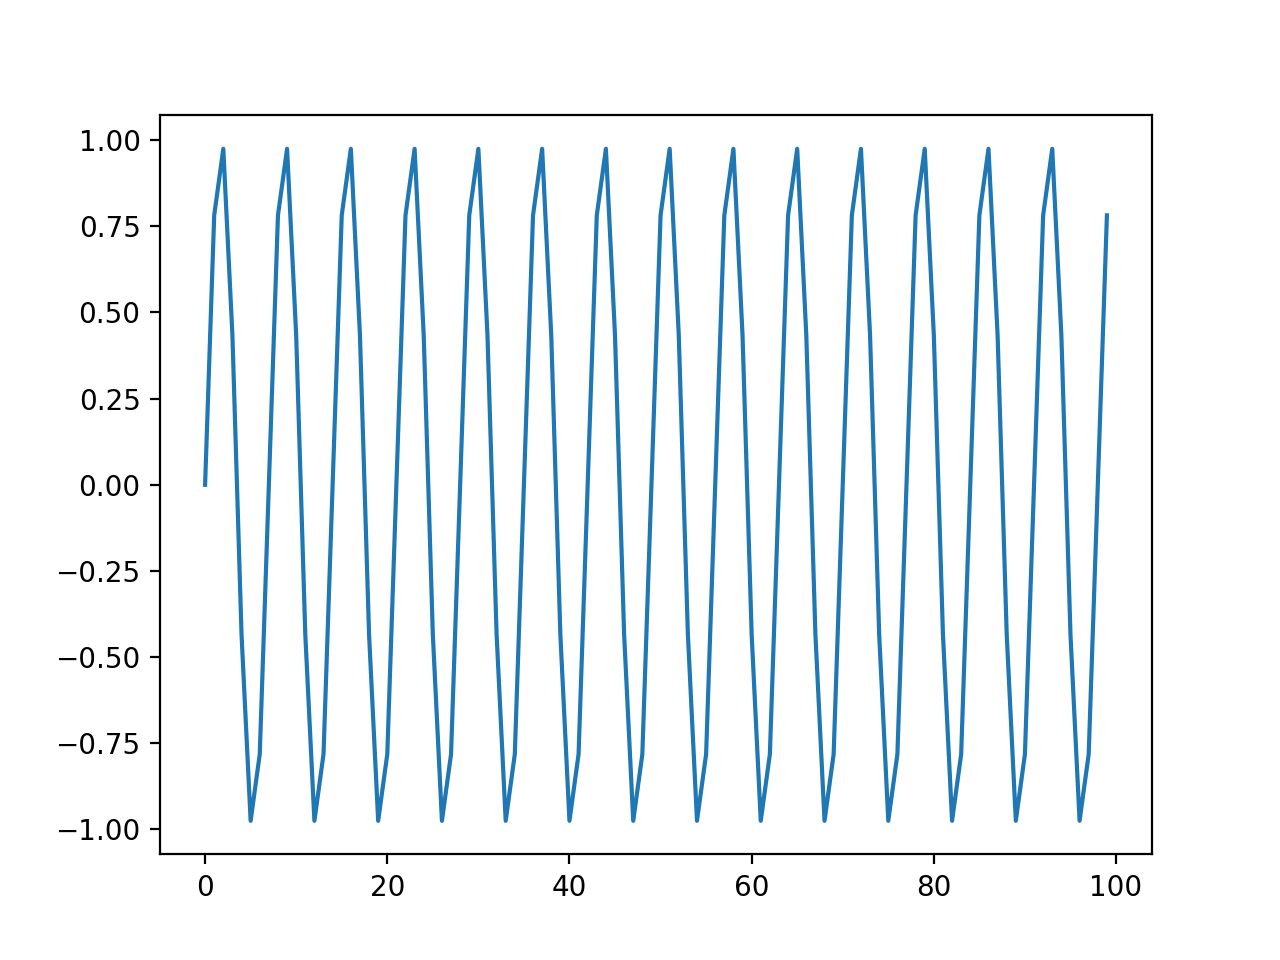

In [18]:
start = 0
plt.plot( sine(7,range(start, start+100)).tolist() )

In [41]:
def bestWeeklySines()
    start =0
    maxCoeff = 0
    bestIndex = 0
    for start in range(7):
        tempCoeff,__ = stats.pearsonr(enWiki_df.iloc[6,4:].values, sine(7,range(start, start+550) ) )
#         print tempCoeff, __
        if abs(maxCoeff) < abs(tempCoeff):
            maxCoeff = tempCoeff
            bestIndex = start
    return bestIndex

-0.0824174024385 0.0533904454977
0.587239707451 2.74996344803e-52
0.814154233552 1.76120166488e-131
0.428630496808 5.49741865359e-26
-0.280268723077 2.19358952281e-11
-0.777660804321 1.52067671272e-112
-0.689677508216 7.37765798659e-79


In [42]:
print bestIndex, maxCoeff

2 0.814154233552


In [2]:
import pickle
def save_obj(obj, name ):
    with open('./../obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('./../obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
def hasNaN(u):
    row, col = u.shape
    for i in range(col):
        if np.isnan(u[0,i]):
            return True
    return False



In [3]:
mydict = {}
mydict[30] = "lalit"
mydict[40] = "singh"

True